In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from itertools import permutations
import numpy as np
import pandas as pd
import tszip
import tskit
import sc2ts

In [2]:
def plot_mutational_spectra(
    ax,
    spectrum_alpha,
    spectrum_delta,
    spectrum_ba1,
    spectrum_ba2,
    spectrum_ba4,
    spectrum_ba5,
    title_text="",
    hide_xaxis=False,
    show_legend=True,
):
    mut_types = spectrum_alpha.keys()
    assert mut_types == spectrum_delta.keys()
    assert mut_types == spectrum_ba1.keys()
    assert mut_types == spectrum_ba2.keys()
    assert mut_types == spectrum_ba4.keys()
    assert mut_types == spectrum_ba5.keys()

    values_alpha = spectrum_alpha.values()
    values_delta = spectrum_delta.values()
    values_ba1 = spectrum_ba1.values()
    values_ba2 = spectrum_ba2.values()
    values_ba4 = spectrum_ba4.values()
    values_ba5 = spectrum_ba5.values()

    bar_width = 0.1
    x = np.arange(len(mut_types))

    ax.bar(x - 5/2 * bar_width, values_alpha, width=bar_width, label="Alpha-like")
    ax.bar(x - 3/2 * bar_width, values_delta, width=bar_width, label="Delta-like")
    ax.bar(x - 1/2 * bar_width, values_ba1, width=bar_width, label="Omicron BA.1-like")
    ax.bar(x + 1/2 * bar_width, values_ba2, width=bar_width, label="Omicron BA.2-like")
    ax.bar(x + 3/2 * bar_width, values_ba4, width=bar_width, label="Omicron BA.4-like")
    ax.bar(x + 5/2 * bar_width, values_ba5, width=bar_width, label="Omicron BA.5-like")

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_title(title_text, loc="left")
    ax.set_ylabel("Proportion of mutations")
    ax.set_xlabel("Mutation type")
    ax.set_xticks(x, mut_types)

    if hide_xaxis:
        ax.get_xaxis().set_visible(False)

    if show_legend:
        ax.legend(frameon=False)

In [3]:
data_dir = Path("../data")

Examine the mutational spectra from the ARG

In [4]:
ts_file = data_dir / "v1-beta1_2023-02-21.pp.md.bpshift.ts.dated.il.tsz"
ts = tszip.decompress(ts_file)
ti = sc2ts.TreeInfo(ts)

Counting descendants :   0%|          | 0/2689054 [00:00<?, ?it/s]

Indexing metadata    :   0%|          | 0/2689054 [00:00<?, ?it/s]

Classifying mutations:   0%|          | 0/1922947 [00:00<?, ?it/s]

In [5]:
report_file = data_dir / "combined.lineage_report.csv.xz"
report_df = pd.read_csv(report_file)
report_df.head(5)

/var/folders/4h/9ylb643n37d8jc7srjm7qzk00000gr/T/ipykernel_73483/2252330650.py:2: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  report_df = pd.read_csv(report_file)


,taxon,lineage,conflict,ambiguity_score,scorpio_call,scorpio_support,scorpio_conflict,scorpio_notes,version,pangolin_version,scorpio_version,constellation_version,is_designated,qc_status,qc_notes,note
0,n0,B,0.0,NaN,NaN,NaN,NaN,NaN,PANGO-v1.33,4.3.1,0.3.19,v0.1.12,True,pass,Ambiguous_content:0.02,Assigned from designation hash.
1,n1,B,0.0,NaN,NaN,NaN,NaN,NaN,PANGO-v1.33,4.3.1,0.3.19,v0.1.12,True,pass,Ambiguous_content:0.02,Assigned from designation hash.
2,n2,A,0.0,NaN,NaN,NaN,NaN,NaN,PANGO-v1.33,4.3.1,0.3.19,v0.1.12,True,pass,Ambiguous_content:0.02,Assigned from designation hash.
3,n3,B,0.0,NaN,NaN,NaN,NaN,NaN,PANGO-v1.33,4.3.1,0.3.19,v0.1.12,True,pass,Ambiguous_content:0.02,Assigned from designation hash.
4,n4,B,0.0,NaN,NaN,NaN,NaN,NaN,PANGO-v1.33,4.3.1,0.3.19,v0.1.12,True,pass,Ambiguous_content:0.02,Assigned from designation hash.


In [6]:
scorpio_counts = Counter(report_df.scorpio_call[~report_df.scorpio_call.isna()])
scorpio_counts

Counter({'Delta (B.1.617.2-like)': 567464,
         'Delta (AY.4-like)': 548624,
         'Omicron (BA.1-like)': 361880,
         'Omicron (BA.2-like)': 355515,
         'Alpha (B.1.1.7-like)': 312583,
         'Omicron (BA.5-like)': 187226,
         'Delta (AY.4.2-like)': 91744,
         'Omicron (BA.4-like)': 26722,
         'Iota (B.1.526-like)': 10845,
         'Epsilon (B.1.429-like)': 8393,
         'Omicron (XBB-like)': 7608,
         'Gamma (P.1-like)': 4907,
         'Epsilon (B.1.427-like)': 4442,
         'Beta (B.1.351-like)': 2868,
         'Mu (B.1.621-like)': 1462,
         'Delta (B.1.617.2-like) +K417N': 1400,
         'Omicron (XE-like)': 1158,
         'Eta (B.1.525-like)': 880,
         'B.1.617.1-like': 491,
         'Omicron (Unassigned)': 381,
         'B.1.1.7-like+E484K': 316,
         'Lambda (C.37-like)': 227,
         'A.23.1-like': 186,
         'Probable Omicron (Unassigned)': 168,
         'AV.1-like': 143,
         'A.23.1-like+E484K': 50,
         'Omic

In [7]:
scorpio_groups = {
    "Alpha": [
        'Alpha (B.1.1.7-like)', # 312583
        'B.1.1.7-like+E484K',    # 316
    ],
    "Delta": [
        'Delta (B.1.617.2-like)',   # 567464
        'Delta (AY.4-like)',    # 548624
        'Delta (AY.4.2-like)',  # 91744
        'Delta (B.1.617.2-like) +K417N',    # 1400
    ],
    "Omicron BA.1": [
        'Omicron (BA.1-like)',  # 361880
    ],
    "Omicron BA.2": [
        'Omicron (BA.2-like)',  # 355515
    ],
    "Omicron BA.4": [
        'Omicron (BA.4-like)',  # 26722
    ],
    "Omicron BA.5": [
        'Omicron (BA.5-like)',  # 187226
    ]
}

In [8]:
total_count = sum(scorpio_counts.values())  # Excluding unassigned
voc_count = 0
for group in scorpio_groups:
    for label in scorpio_groups[group]:
        voc_count += scorpio_counts[label]
print(f"Total: {total_count}")
print(f"VoC: {voc_count} ({round(voc_count / total_count, 2) * 100}%)")

Total: 2497685
VoC: 2453474 (98.0%)


In [9]:
def get_mutational_spectrum_arg(ts, ti, df, scorpio_labels):
    # Format: nXXXX, where XXXX is the node ID.
    node_ids = [int(x[1:]) for x in df.taxon[df.scorpio_call.isin(scorpio_labels)]]
    is_focal_mut = np.isin(ts.mutations_node, node_ids)
    spectrum = OrderedDict()
    for p in permutations(tskit.ALLELES_ACGT, 2):
        spectrum[p[0] + ">" + p[1]] = 0
    for a, b in zip(
        ti.mutations_inherited_state[is_focal_mut],
        ti.mutations_derived_state[is_focal_mut],
    ):
        if a == "-" or b == "-":
            continue
        spectrum[a + ">" + b] += 1
    tot_muts = sum(spectrum.values())
    for x in spectrum:
        spectrum[x] /= tot_muts
    print(f"Sum: {sum(spectrum.values())}")
    return spectrum

In [10]:
spectrum_alpha_arg = get_mutational_spectrum_arg(ts, ti, report_df, scorpio_groups["Alpha"])
spectrum_delta_arg = get_mutational_spectrum_arg(ts, ti, report_df, scorpio_groups["Delta"])
spectrum_ba1_arg = get_mutational_spectrum_arg(ts, ti, report_df, scorpio_groups["Omicron BA.1"])
spectrum_ba2_arg = get_mutational_spectrum_arg(ts, ti, report_df, scorpio_groups["Omicron BA.2"])
spectrum_ba4_arg = get_mutational_spectrum_arg(ts, ti, report_df, scorpio_groups["Omicron BA.4"])
spectrum_ba5_arg = get_mutational_spectrum_arg(ts, ti, report_df, scorpio_groups["Omicron BA.5"])

Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0


Examine the mutational spectra from Bloom et al. (2023)
https://pmc.ncbi.nlm.nih.gov/articles/PMC10124870/

In [11]:
bloom_url = "https://media.githubusercontent.com/media/jbloomlab/SARS2-mut-spectrum/refs/heads/main/results/mutation_counts/aggregated.csv"
bloom_df = pd.read_csv(bloom_url)
bloom_df = bloom_df[~bloom_df.exclude].reset_index(drop=True)
bloom_df.head(5)

,protein,aa_mutation,nt_mutation,codon_change,synonymous,count,nt_site,reference_nt,clade_founder_nt,exclude,exclude_reason,clade,subset,codon_position,four_fold_degenerate
0,ORF1ab,P5401L,C16466T,CCA>CTA,False,62,16466,C,C,False,NaN,19A,all,2,False
1,M,I82T,T26767C,ATC>ACC,False,54,26767,T,T,False,NaN,19A,all,2,False
2,ORF1a;ORF1ab,F924F;F924F,C3037T,TTC>TTT;TTC>TTT,True,49,3037,C,C,False,NaN,19A,all,3,False
3,ORF1ab,A6319V,C19220T,GCT>GTT,False,46,19220,C,C,False,NaN,19A,all,2,False
4,ORF1ab,I5658V,A17236G,ATA>GTA,False,45,17236,A,A,False,NaN,19A,all,1,False


In [12]:
def get_mutational_spectrum_bloom(df, nextclade_labels, only_degenerate=False):
    df_tmp = df[df.clade.isin(nextclade_labels)].reset_index(drop=True)
    if only_degenerate:
        df_tmp = df_tmp[df_tmp.four_fold_degenerate].reset_index(drop=True)
    spectrum = OrderedDict()
    for p in permutations(tskit.ALLELES_ACGT, 2):
        spectrum[p[0] + ">" + p[1]] = 0
    for row in df_tmp.itertuples():
        a = row.nt_mutation[0]
        b = row.nt_mutation[-1]
        spectrum[a + ">" + b] += row.count  # NOTE: Important
    tot_muts = sum(spectrum.values())
    for x in spectrum:
        spectrum[x] /= tot_muts
    print(f"Sum: {sum(spectrum.values())}")
    return spectrum

In [13]:
# Including non-degenerate sites
spectrum_alpha_bloom = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["20I"])
spectrum_delta_bloom = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["21I", "21J"])
spectrum_ba1_bloom = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["21K"])
spectrum_ba2_bloom = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["21L"])
spectrum_ba4_bloom = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["22A"])
spectrum_ba5_bloom = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["22B"])

Sum: 0.9999999999999999
Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0


In [14]:
# Excluding non-degenerate sites
spectrum_alpha_bloom_deg = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["20I"], only_degenerate=True)
spectrum_delta_bloom_deg = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["21I", "21J"], only_degenerate=True)
spectrum_ba1_bloom_deg = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["21K"], only_degenerate=True)
spectrum_ba2_bloom_deg = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["21L"], only_degenerate=True)
spectrum_ba4_bloom_deg = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["22A"], only_degenerate=True)
spectrum_ba5_bloom_deg = get_mutational_spectrum_bloom(bloom_df, nextclade_labels=["22B"],only_degenerate=True)

Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0
Sum: 1.0


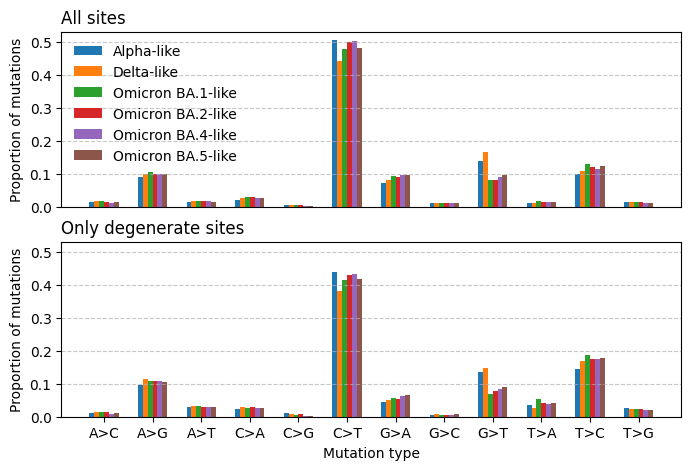

In [15]:
# The mutational spectra including and excluding non-degenerate sites are different.
_, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(8, 5))

plot_mutational_spectra(
    ax=ax[0],
    spectrum_alpha=spectrum_alpha_bloom,
    spectrum_delta=spectrum_delta_bloom,
    spectrum_ba1=spectrum_ba1_bloom,
    spectrum_ba2=spectrum_ba2_bloom,
    spectrum_ba4=spectrum_ba4_bloom,
    spectrum_ba5=spectrum_ba5_bloom,
    title_text="All sites",
    hide_xaxis=True,
)

# This is shown in Figure 1 of Bloom et al.
plot_mutational_spectra(
    ax=ax[1],
    spectrum_alpha=spectrum_alpha_bloom_deg,
    spectrum_delta=spectrum_delta_bloom_deg,
    spectrum_ba1=spectrum_ba1_bloom_deg,
    spectrum_ba2=spectrum_ba2_bloom_deg,
    spectrum_ba4=spectrum_ba4_bloom_deg,
    spectrum_ba5=spectrum_ba5_bloom_deg,
    title_text="Only degenerate sites",
    show_legend=False,
)

Compare the all-site mutational spectra from the ARG and Bloom et al.

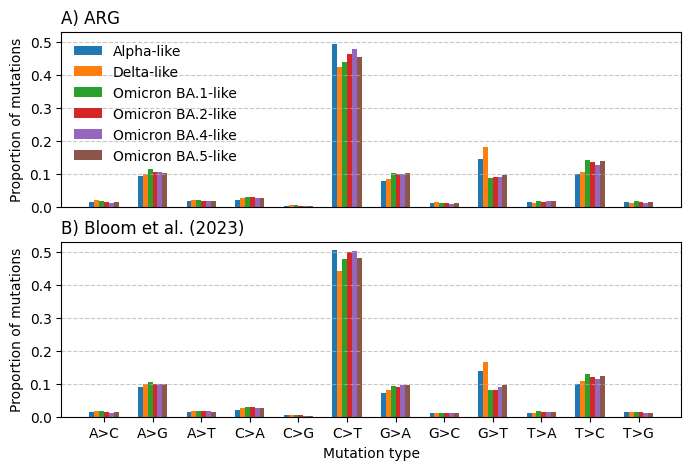

In [16]:
_, ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(8, 5))

plot_mutational_spectra(
    ax=ax[0],
    spectrum_alpha=spectrum_alpha_arg,
    spectrum_delta=spectrum_delta_arg,
    spectrum_ba1=spectrum_ba1_arg,
    spectrum_ba2=spectrum_ba2_arg,
    spectrum_ba4=spectrum_ba4_arg,
    spectrum_ba5=spectrum_ba5_arg,
    title_text="A) ARG",
    hide_xaxis=True,
)

# This is shown in Figure 1 of Bloom et al.
plot_mutational_spectra(
    ax=ax[1],
    spectrum_alpha=spectrum_alpha_bloom,
    spectrum_delta=spectrum_delta_bloom,
    spectrum_ba1=spectrum_ba1_bloom,
    spectrum_ba2=spectrum_ba2_bloom,
    spectrum_ba4=spectrum_ba4_bloom,
    spectrum_ba5=spectrum_ba5_bloom,
    title_text="B) Bloom et al. (2023)",
    show_legend=False,
)